# Import Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [85]:
df = pd.read_csv("diabetes_prediction_dataset.csv")


In [86]:
# info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Data Cleaing

In [87]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# Feature Engineering

In [88]:
# Remove duplicate
df.drop_duplicates(inplace=True)


In [89]:
# Apply one-hot encoding to 'gender' and 'smoking_history'
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)


In [112]:
# If the dataset has symptom severity weights, apply them
if 'severity' in df.columns:
    severity_weights = df['severity']
else:
    severity_weights = None

# For example, convert Yes/No to 1/0
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [92]:
# Display the transformed dataset
df.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


# Train_Test

In [93]:
from sklearn.model_selection import train_test_split

# features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model

Decisiontree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluate model performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9485699427977119
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.70      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.96801872074883
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [97]:
import pickle

# Save the model
filename = 'random_forest_model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

MLP Classifier

In [98]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# predictions

y_pred_mlp = mlp.predict(X_test)

# Evaluate model performance
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network Accuracy: 0.9618824752990119
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       1.00      0.58      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.98      0.79      0.85     19230
weighted avg       0.96      0.96      0.96     19230



# Incorporate an Open-Source LLM

In [99]:
!pip install transformers


In [100]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the GPT-2 model and tokenizer
model_name = "gpt2"  #  "gpt2-medium"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)


In [101]:
def generate_symptom_explanation(symptom):
    # Define prompt
    prompt = f"Symptom explanation for {symptom}:"
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate output
    output = model.generate(inputs['input_ids'], max_length=50, num_return_sequences=1)
    explanation = tokenizer.decode(output[0], skip_special_tokens=True)
    return explanation


In [102]:
def interactive_assistant(prompt):
    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate a response
    response = model.generate(inputs['input_ids'], max_length=100, num_return_sequences=1)
    answer = tokenizer.decode(response[0], skip_special_tokens=True)
    return answer


In [103]:
# User inputs symptom
symptom = "headache"
print(f"Explanation for {symptom}:", generate_symptom_explanation(symptom))

user_question = "Based on my symptoms, would you suggest any lifestyle changes?"
print("Assistant:", interactive_assistant(user_question))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explanation for headache: Symptom explanation for headache:

The headache is caused by a combination of the following:

The headache is caused by a combination of the following:

The headache is caused by a combination of the following:

The headache
Assistant: Based on my symptoms, would you suggest any lifestyle changes?

I have been on a diet for over a year now and I have been on a diet for over a year now and I have been on a diet for over a year now and I have been on a diet for over a year now and I have been on a diet for over a year now and I have been on a diet for over a year now and I have been on a diet for over a year now and I have


# Confidence Score

In [104]:
import pandas as pd

# Assuming the Random Forest model `random_forest` is already trained

#  prediction probabilities for test set
probabilities = random_forest.predict_proba(X_test)

# Get the class labels
class_labels = random_forest.classes_

# Create a DataFrame for easy visualization
confidence_df = pd.DataFrame(probabilities, columns=class_labels)
confidence_df['Predicted Disease'] = confidence_df.idxmax(axis=1)
confidence_df['Confidence Score'] = confidence_df.max(axis=1)

# predictions with confidence scores
confidence_df.head()


,0,1,Predicted Disease,Confidence Score
0,1.0,0.0,0,1.0
1,1.0,0.0,0,1.0
2,0.0,1.0,1,1.0
3,1.0,0.0,0,1.0
4,1.0,0.0,0,1.0


In [105]:
 #prompt: Using dataframe confidence_df: diabetes

# Calculate the mean confidence score for each predicted disease class.
mean_confidence_by_disease = confidence_df.groupby('Predicted Disease')['Confidence Score'].mean()

# results.
mean_confidence_by_disease

,Confidence Score
Predicted Disease,
0,0.96968
1,1.00000


Data Visualization

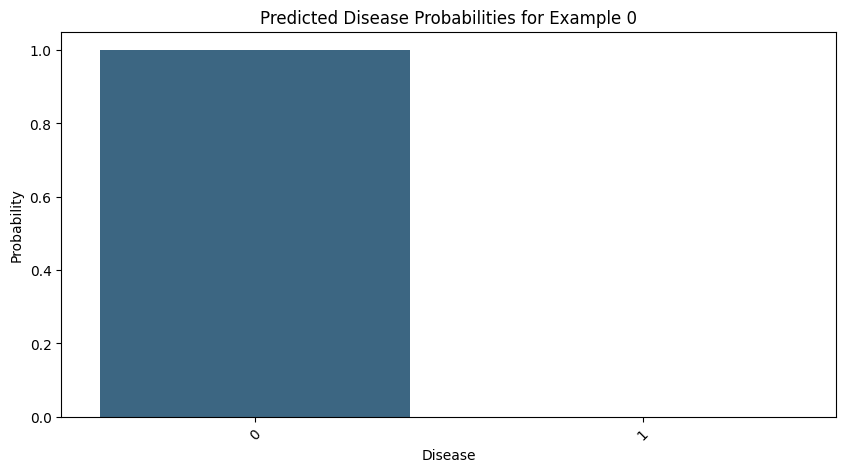

In [106]:


# Function to plot prediction probabilities for a given example
def plot_disease_probabilities(example_index):
    example = confidence_df.iloc[example_index]
    disease_probs = example[:-2]  # exclude 'Predicted Disease' and 'Confidence Score' columns

    plt.figure(figsize=(10, 5))
    sns.barplot(x=disease_probs.index, y=disease_probs.values, palette="viridis")
    plt.title(f"Predicted Disease Probabilities for Example {example_index}")
    plt.xlabel("Disease")
    plt.ylabel("Probability")
    plt.xticks(rotation=45)
    plt.show()

# Plot for the first example
plot_disease_probabilities(0)


In [107]:
!pip install ipywidgets


Interactive Symptom Selection

In [108]:
import ipywidgets as widgets
from IPython.display import display

# available symptoms based on your dataset
available_symptoms = X.columns.tolist()

# Multi-select widget for symptoms
symptom_selector = widgets.SelectMultiple(
    options=available_symptoms,
    description='Symptoms',
    disabled=False
)

# Button to update prediction
update_button = widgets.Button(description="Update Prediction")

# widget and button
display(symptom_selector, update_button)

# Callback function to update prediction based on selected symptoms
def update_prediction(b):
    # Create a sample input with selected symptoms marked as 1, others as 0
    input_data = pd.DataFrame(0, index=[0], columns=available_symptoms)
    for symptom in symptom_selector.value:
        input_data[symptom] = 1

    # Get model prediction and probability
    prediction = random_forest.predict(input_data)[0]
    probabilities = random_forest.predict_proba(input_data)[0]

    # Display prediction and confidence scores
    print(f"Predicted Disease: {prediction}")
    for disease, prob in zip(class_labels, probabilities):
        print(f"{disease}: {prob:.2f}")

# Link button to prediction function
update_button.on_click(update_prediction)


SelectMultiple(description='Symptoms', options=('age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', …

Button(description='Update Prediction', style=ButtonStyle())

# Evaluation and Model Refinement

Calculate Evaluation Metrics

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass support
recall = recall_score(y_test, y_pred, average='weighted')

# results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Full classification report for more details
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97
Precision: 0.97
Recall: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



Hyperparameter Tuning with Cross-Validation

In [110]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Display best parameters
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.9710073267391465


In [111]:
# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Calculate metrics for the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')

# Display results
print(f"Optimized Model Accuracy: {accuracy_best:.2f}")
print(f"Optimized Model Precision: {precision_best:.2f}")
print(f"Optimized Model Recall: {recall_best:.2f}")

# Classification report for the optimized model
print("\nOptimized Model Classification Report:\n", classification_report(y_test, y_pred_best))


Optimized Model Accuracy: 0.97
Optimized Model Precision: 0.97
Optimized Model Recall: 0.97

Optimized Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.98      0.68      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

